In [6]:
import pandas as pd  # ✅ Correcto
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [7]:
# Cargar datos procesados
X = pd.read_csv('../data/processed/X_processed.csv')
y = pd.read_csv('../data/processed/y.csv').squeeze()

In [8]:
# Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [10]:
# Reducción de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

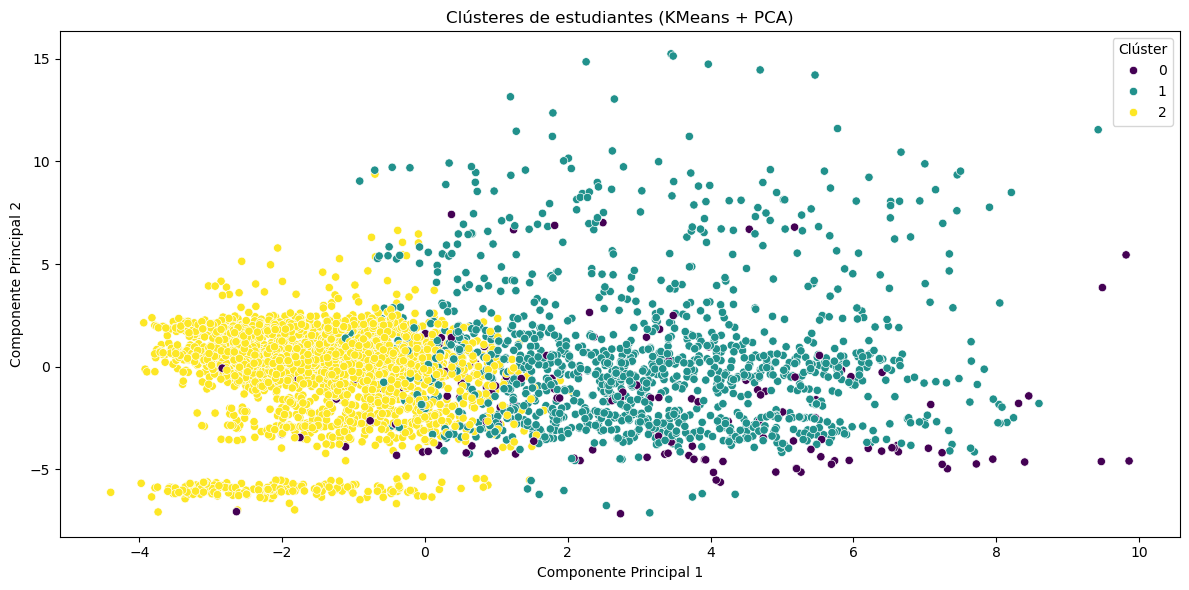

In [11]:
# Visualización de clústeres
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('Clústeres de estudiantes (KMeans + PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.tight_layout()
plt.savefig('../reports/clusters_visualization.png')
plt.show()

In [12]:
# Analizar relación entre clústeres y Target
cluster_df = pd.DataFrame({'Clúster': clusters, 'Target': y})
print("📊 Distribución de clústeres por Target:")
print(cluster_df.groupby('Clúster')['Target'].value_counts().unstack(fill_value=0))

📊 Distribución de clústeres por Target:
Target      0     1
Clúster            
0          97    65
1         906   412
2        1206  1732
